Training Accuracy: 0.8812
Validation (Test) Accuracy: 0.8500
Cross-Validation Mean Accuracy: 0.8850


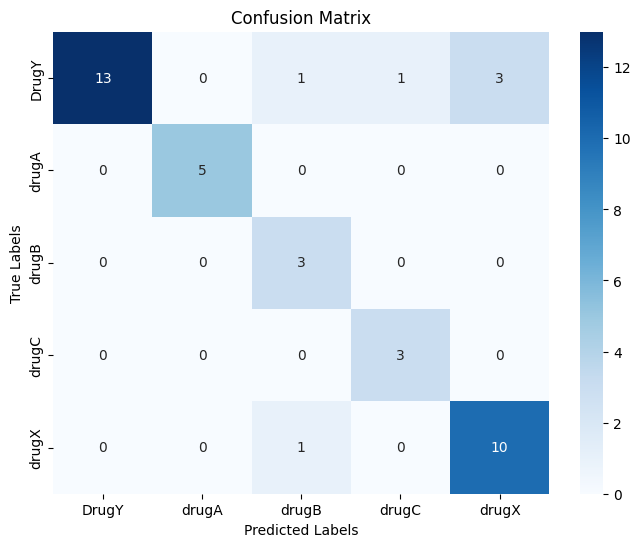


Classification Report:
              precision    recall  f1-score   support

       DrugY       1.00      0.72      0.84        18
       drugA       1.00      1.00      1.00         5
       drugB       0.60      1.00      0.75         3
       drugC       0.75      1.00      0.86         3
       drugX       0.77      0.91      0.83        11

    accuracy                           0.85        40
   macro avg       0.82      0.93      0.86        40
weighted avg       0.89      0.85      0.85        40



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings('ignore')

from preprocessing import load_and_preprocess_data

# Load and preprocess
"""
Loads the dataset, encodes categorical features and target variable,
and applies one-hot encoding and scaling using a ColumnTransformer.
"""
X_transformed, y, label_encoder, column_transformer = load_and_preprocess_data("drug200.csv")

# Train-test split
"""
Splits the data into training and test sets using stratified sampling
to preserve class distribution.
"""
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression
"""
Initializes and trains a multinomial logistic regression model
with regularization and balanced class weights.
"""
model = LogisticRegression(C=0.15, max_iter=2000, class_weight='balanced', multi_class='multinomial')
model.fit(X_train, y_train)

# Predictions
"""
Generates predictions on both training and test datasets.
"""
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy
"""
Calculates and prints training and test accuracy.
"""
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Cross-validation
"""
Performs stratified 5-fold cross-validation and computes mean accuracy.
"""
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_transformed, y, cv=cv, scoring='accuracy')

# Print results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation (Test) Accuracy: {test_accuracy:.4f}")
print(f"Cross-Validation Mean Accuracy: {cv_scores.mean():.4f}")

# Confusion Matrix
"""
Generates and plots the confusion matrix for test predictions.
"""
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification report
"""
Prints a detailed classification report including precision, recall, and F1-score.
"""
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))
